
## A Tech-support call-center wants to know based on the certain variables whether an employee can be promoted or not. Create a model using Random Forest to predict whether an employee will be promoted or not.



**Dataset Description**

    Feature 		Definition
    employee_id		Unique ID for employee
    department		Department of employee
    education		Education Level
    gender			Gender of Employee
    no_of_trainings		no of other trainings completed in previous year on soft skills, technical skills etc.
    age	     		Age of Employee
    last_promotion_rating	Employee Rating for the previous year
    employee_since_years	Length of service in years
    all_tasks_completed	If employee has completed all the tasks assigned to him/her
    training_marks		Marks in current year's training evaluations
    is_promoted		(Target)To promote or not

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

**Get the data**

In [3]:
df = pd.read_csv("hrdata.csv")

In [4]:
df.head()

,Unnamed: 0,employee_id,department,education,gender,no_of_trainings,age,last_promotion_rating,employee_since_years,all_tasks_completed,training_marks,is_promoted
0,0,2001001,Sales & Marketing,Master's & above,f,1,35,5,8,1,49,0
1,1,2001002,Operations,Bachelor's,m,1,30,5,4,0,60,0
2,2,2001003,Sales & Marketing,Bachelor's,m,1,34,3,7,0,50,0
3,3,2001004,Sales & Marketing,Bachelor's,m,2,39,1,10,0,50,0
4,4,2001005,Technology,Bachelor's,m,1,45,3,2,0,73,0


In [5]:
df.shape

(48660, 12)

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.dtypes.value_counts()

int64     8
object    3
dtype: int64

**Check for Null values**

In [8]:
df.isnull().sum()

employee_id              0
department               0
education                0
gender                   0
no_of_trainings          0
age                      0
last_promotion_rating    0
employee_since_years     0
all_tasks_completed      0
training_marks           0
is_promoted              0
dtype: int64

## EDA

**Plot bar chart of target variable**



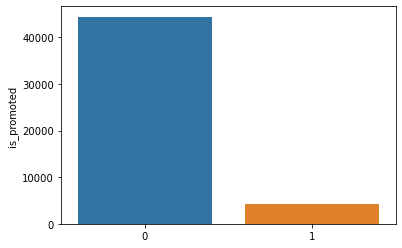

In [9]:
sns.barplot(x=df.is_promoted.value_counts().index, y=df.is_promoted.value_counts());

**Check % of 0s and 1s in Target variable**

In [10]:
df.is_promoted.value_counts(normalize=True)

0    0.913029
1    0.086971
Name: is_promoted, dtype: float64

##### Inference: Data seems to be highly imbalanced with only 8% of 1s in target variable

**Check the gender distribution**

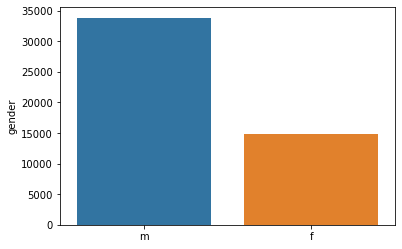

In [11]:
sns.barplot(x=df.gender.value_counts().index, y=df.gender.value_counts());

**Check distribution of continuous variables**

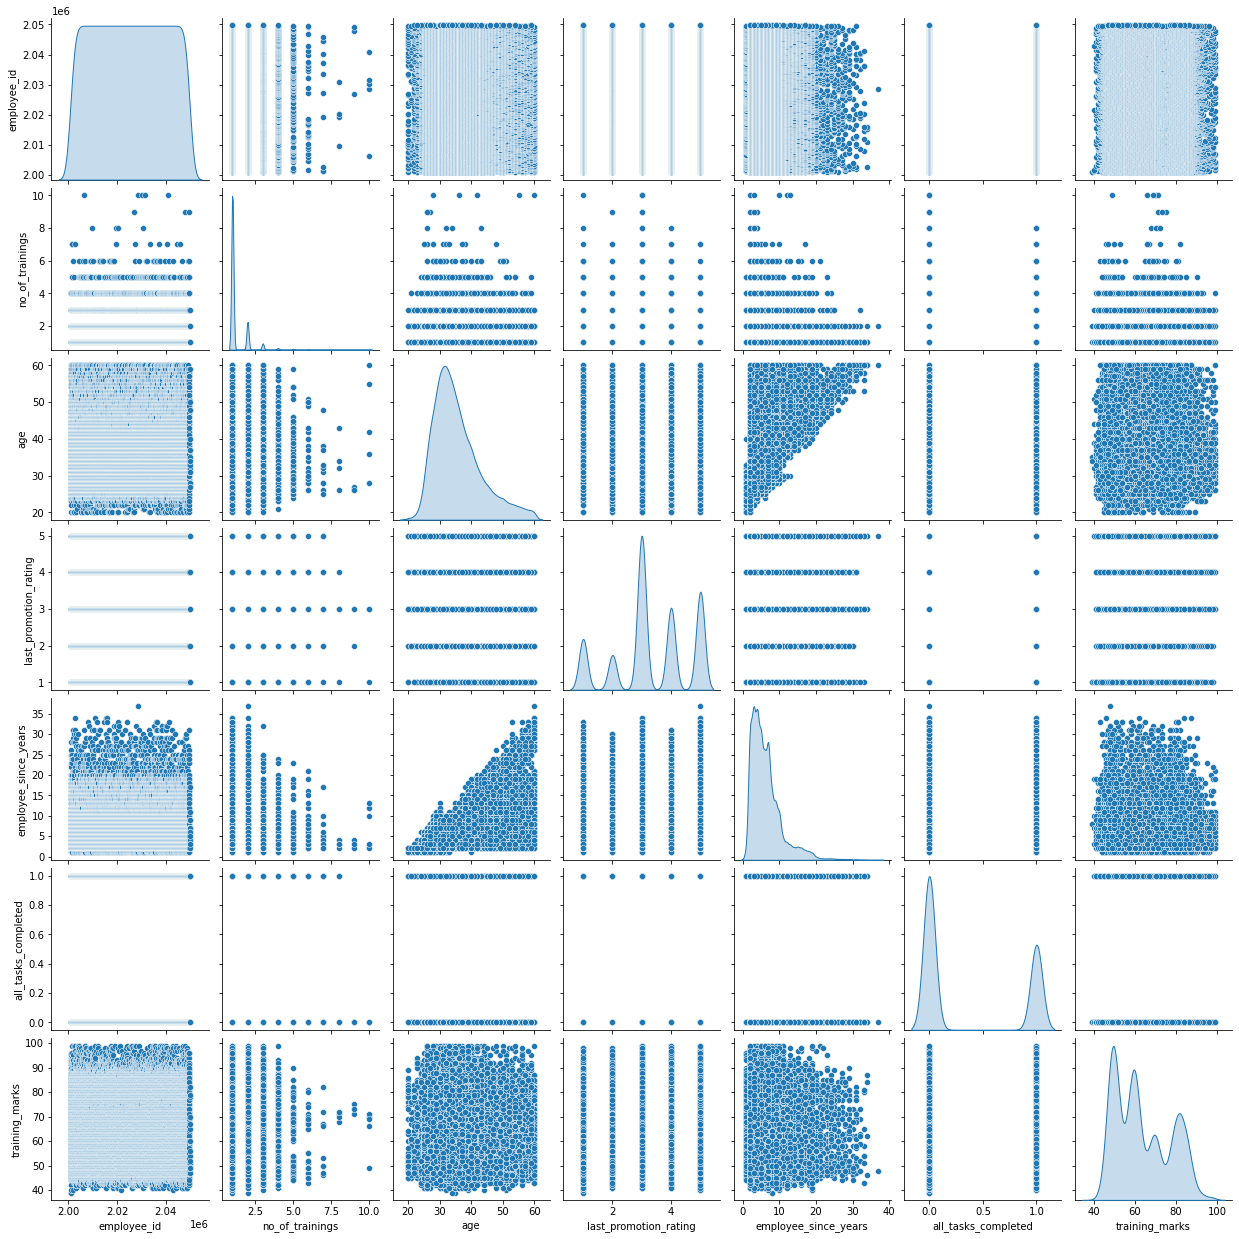

In [12]:
continuous=df.dtypes[df.dtypes=='int64'].index

sns.pairplot(df[continuous].drop('is_promoted',axis=1),diag_kind='kde')
plt.show()

**Plot gender with target variable**

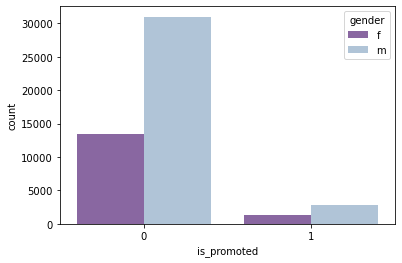

In [13]:
sns.countplot(x=df.is_promoted,hue=df.gender,palette='BuPu_r')
plt.show()

**Plot Employee Since vs Training marks**

set hue as is_promoted

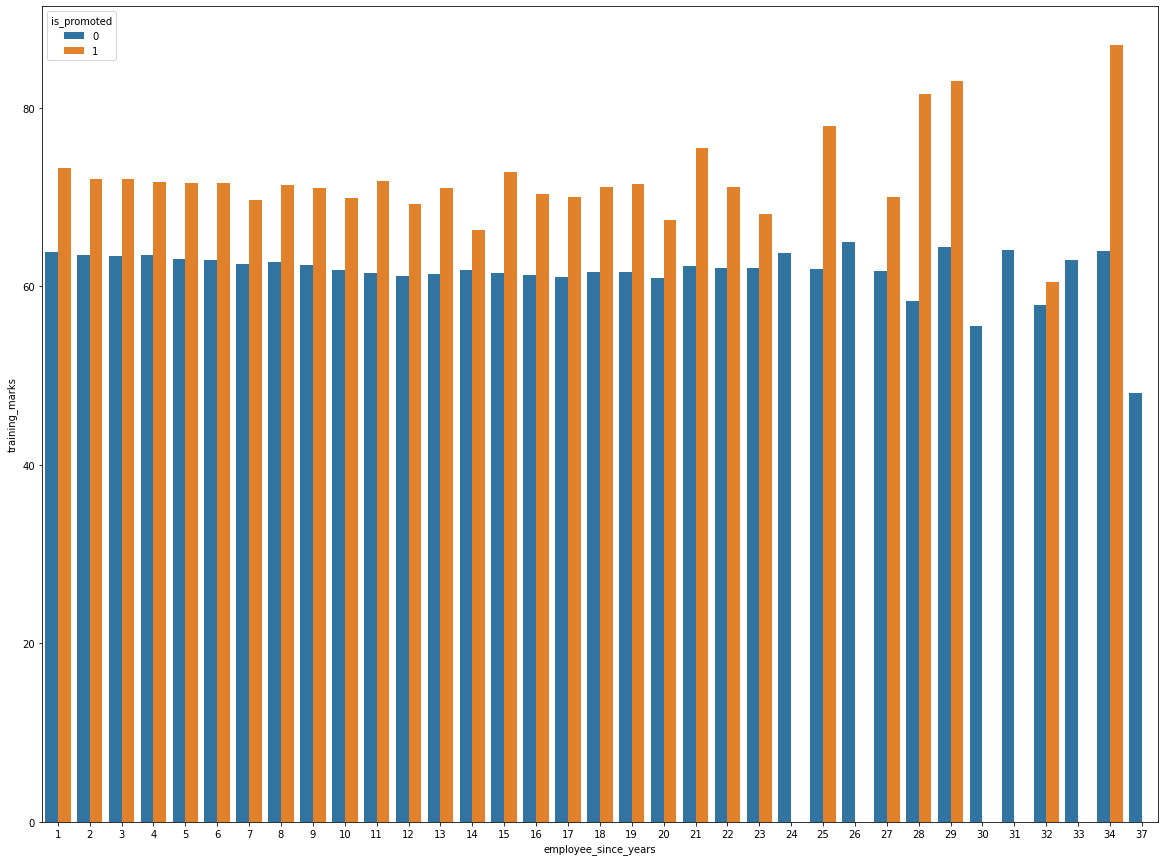

In [14]:
plt.figure(figsize=(20,15))
sns.barplot(x=df.employee_since_years,y=df.training_marks, hue=df.is_promoted,ci=False);
#plt.show()

**Check for outliers**

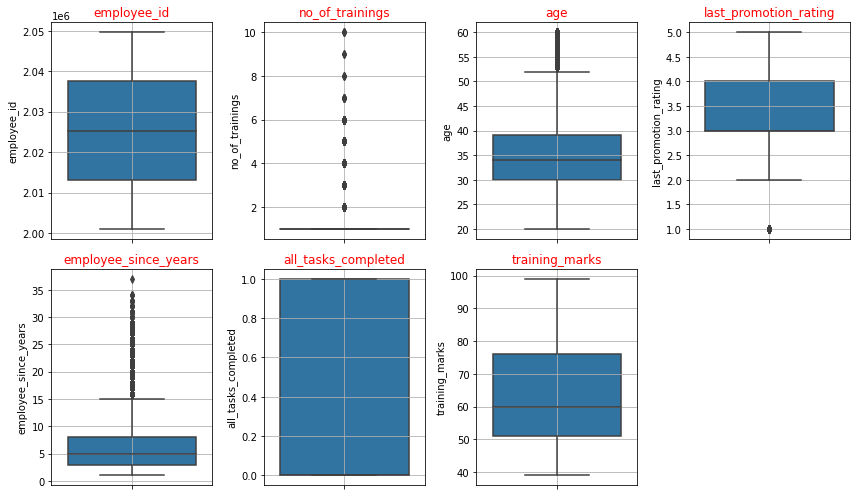

In [15]:
data_plot=df[continuous].drop('is_promoted',axis=1)
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

**There are many outliers in the employee_since_years, age and no_trainings**

**Convert Object datatypes to categorical**

In [16]:
df.gender=pd.Categorical(df.gender).codes

In [17]:
#convert department and education to 0s and 1s using get_dummies in pandas
department=pd.get_dummies(df.department,drop_first=True)
education=pd.get_dummies(df.education,drop_first=True)
df=pd.concat((df.drop(['education','department'],axis=1),department,education),axis=1)

In [18]:
df.head()

,employee_id,gender,no_of_trainings,age,last_promotion_rating,employee_since_years,all_tasks_completed,training_marks,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above
0,2001001,0,1,35,5,8,1,49,0,0,0,0,0,0,0,1,0,0,1
1,2001002,1,1,30,5,4,0,60,0,0,0,0,1,0,0,0,0,0,0
2,2001003,1,1,34,3,7,0,50,0,0,0,0,0,0,0,1,0,0,0
3,2001004,1,2,39,1,10,0,50,0,0,0,0,0,0,0,1,0,0,0
4,2001005,1,1,45,3,2,0,73,0,0,0,0,0,0,0,0,1,0,0


In [19]:
# capture the target column ("default") into separate vectors for training set and test set
X = df.drop(["is_promoted",'employee_id'] , axis=1)
y = df.pop("is_promoted")

In [20]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


# Ensemble RandomForest Classifier

**Instantiate the Random Forest Classifier Class**

In [21]:
rfcl = RandomForestClassifier(n_estimators = 501, random_state=123)
rfcl = rfcl.fit(X_train, train_labels)

**Perform Grid Search**

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [23]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

**Get best parameters**

In [24]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [25]:
best_grid = grid_search.best_estimator_

**Predict on both train and test sets**

In [26]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

**Check Feature Importances**

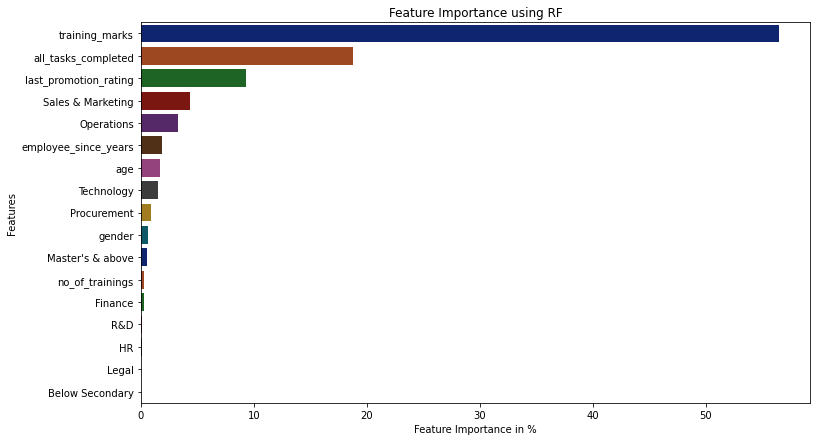

In [28]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

**Using Scikit-learn metrics, print confusion matrix and classification report**

**Plot ROC Curve and print area under the curve**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data


## Conclusion
